## Assignment 3
### To design a neural network from scratch to recognize handwriting digits (0-9).


**Data source:**
The data file contains 1797 instances from 43 writers. The data is prepared by NIST to extract normalized bitmaps of handwritten digits from a preprinted form.

https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits-orig.windep.Z

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

**Encoding**

**Unzip the data file from the link. Encode the data into input(X) and target(Y) for neural network training.**

In [ ]:
filename = '/content/drive/MyDrive/CS795-DeepLearning/Assignment3/optdigits-orig.windep'
with open(filename, 'r') as file:
    lines = file.readlines()
print(len(lines))

59322


In [ ]:
lines[:60]

['BU handwritten digit database: E Alpaydin C Kaynak 1995\n',
 'Writer-independent test file\n',
 '\n',
 'entwidth = 32\n',
 'entheight = 32\n',
 'depth = 1\n',
 'density = 300\n',
 'whitepix = 0\n',
 'ntot = 1797\n',
 'ndigit = 1797\n',
 'nlower = 0\n',
 'nupper = 0\n',
 'nparag = 0\n',
 'firstdigit = 0\n',
 'lastdigit = 0\n',
 'firstlower = 0\n',
 'lastlower = 0\n',
 'firstupper = 0\n',
 'lastupper = 0\n',
 'firstparag = 0\n',
 'lastparag = 0\n',
 '00000000000011000000000000000000\n',
 '00000000000111101000000000000000\n',
 '00000000001111111111000000000000\n',
 '00000000001111111111100000000000\n',
 '00000000011111111111111000000000\n',
 '00000000011111111111111110000000\n',
 '00000000011111110011111111000000\n',
 '00000000111111100000111111000000\n',
 '00000000111110000000011111000000\n',
 '00000001111110000000011111000000\n',
 '00000001111100000000001111000000\n',
 '00000001111000000000011111000000\n',
 '00000001111000000000001111000000\n',
 '00000001111000000000001111000000\n',
 

In [ ]:
images = []
labels = []


start_idx = 0
for i, line in enumerate(lines):
    if line.strip().isdigit():
        start_idx = i
        break

for i in range(start_idx, len(lines), 33):
    image = ''.join(lines[i:i+32]).replace('\n', '')
    image = np.array([int(pixel) for pixel in image])
    label = int(lines[i+32].strip())

    images.append(image)
    labels.append(label)

In [ ]:
data = {'label': labels}
for i in range(1024):  # 32*32 pixels for each image
    data[f'pixel{i}'] = [image[i] for image in images]

df = pd.DataFrame(data)
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1794,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1795,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
np_dataset = np.array(df)
np_dataset

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

In [ ]:
m, n = np_dataset.shape
m, n

(1797, 1025)

In [ ]:
np.random.shuffle(np_dataset)

In [ ]:
# 70% of total for training, 15% of total for validation and 15% of total for testing
train_val_set, test_set = train_test_split(np_dataset, test_size=0.15)  # 85% for training + validation , 15% for testing

train_set, val_set = train_test_split(train_val_set, test_size=0.1765)  # 17.65% of 85%(training + validation) for validation

In [ ]:
# number of instances and lable(1)+pixels(1024) - (#instances, lable+pixels)
print(f"train_set shape: {train_set.shape}\n")
print(f"test_set shape: {test_set.shape}\n")
print(f"val_set shape: {val_set.shape}\n")

train_set shape: (1257, 1025)

test_set shape: (270, 1025)

val_set shape: (270, 1025)



In [ ]:
# Training set
train_dataset = train_set.T
X_train = train_dataset[1:n]
X_train = X_train / 255.
Y_train = train_dataset[0]

In [ ]:
# Test set
test_dataset = test_set.T
X_test = test_dataset[1:n]
X_test = X_test / 255.
Y_test = test_dataset[0]

In [ ]:
# Validation set
val_dataset = val_set.T
X_val = val_dataset[1:n]
X_val = X_val / 255.
Y_val = val_dataset[0]

**Neural Network Training**

Building the Neural Network from scratch.

In [ ]:
def init_params(features):
    W1 = np.random.rand(128, features) - 0.5  # From input layer to first hidden layer
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(64, 128) - 0.5  # From first hidden layer to second hidden layer
    b2 = np.random.rand(64, 1) - 0.5
    W3 = np.random.rand(10, 64) - 0.5   # From second hidden layer to output layer
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, W3, b3, X, keep_prob=1):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    D1 = np.random.rand(A1.shape[0], A1.shape[1]) < keep_prob
    A1 = np.multiply(A1, D1)
    A1 /= keep_prob

    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    D2 = np.random.rand(A2.shape[0], A2.shape[1]) < keep_prob
    A2 = np.multiply(A2, D2)
    A2 /= keep_prob

    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)

    return Z1, D1, A1, Z2, D2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((10, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def backward_prop(Z1, D1, A1, Z2, D2, A2, Z3, A3, W1, W2, W3, X, Y, lambda_val, keep_prob):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)

    dZ3 = A3 - one_hot_Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T) + (lambda_val / m) * W3
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dA2 = dA2 * D2
    dA2 = dA2 / keep_prob
    dZ2 = dA2 * ReLU_deriv(Z2)
    dW2 = (1 / m) * np.dot(dZ2, A1.T) + (lambda_val / m) * W2
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dA1 = dA1 * D1
    dA1 = dA1 / keep_prob
    dZ1 = dA1 * ReLU_deriv(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T) + (lambda_val / m) * W1
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr):
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    W3 -= lr * dW3
    b3 -= lr * db3
    return W1, b1, W2, b2, W3, b3

In [ ]:
def get_predictions(A4):
    return np.argmax(A4, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def compute_cross_entropy_loss(A4, Y, W1, W2, W3, lambda_val):
    m = Y.shape[0]
    one_hot_Y = one_hot(Y)
    cross_entropy_cost = -np.sum(one_hot_Y * np.log(A4 + 1e-8)) / m

    L2_cost = (lambda_val / (2 * m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))

    cost = cross_entropy_cost + L2_cost
    return cost

In [ ]:
def create_mini_batches(X, Y, batch_size):
    m = X.shape[1]
    mini_batches = []

    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[permutation].reshape((1, m))

    num_complete_minibatches = m // batch_size

    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * batch_size : (k + 1) * batch_size]
        mini_batch_Y = shuffled_Y[:, k * batch_size : (k + 1) * batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    if m % batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

In [ ]:
def gradient_descent(X, Y, X_val, Y_val, initial_lr, reduce_factor, min_lr, patience, epsilon, batch_size, keep_prob, lambda_val):
    times = [0]
    start_time = time.time()

    features = X.shape[0]
    W1, b1, W2, b2, W3, b3 = init_params(features)

    lr = initial_lr
    best_val_loss = float('inf')
    prev_val_loss = float('inf')
    epochs_no_improve = 0
    training = True

    epoch = 0

    while training:
        mini_batches = create_mini_batches(X, Y, batch_size)
        for mini_batch in mini_batches:
            (mini_batch_X, mini_batch_Y) = mini_batch

            Z1, D1, A1, Z2, D2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, mini_batch_X, keep_prob)
            dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, D1, A1, Z2, D2, A2, Z3, A3, W1, W2, W3, mini_batch_X, mini_batch_Y, lambda_val, keep_prob)
            W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr)

        _, _, _, _, _, _, _, A3_val = forward_prop(W1, b1, W2, b2, W3, b3, X_val)
        val_loss = compute_cross_entropy_loss(A3_val, Y_val, W1, W2, W3, lambda_val=0.0005)

        val_accuracy = get_accuracy(get_predictions(A3_val), Y_val)

        # Early Stopping Check
        if prev_val_loss - val_loss < epsilon:
            epochs_no_improve += 1
        else:
            epochs_no_improve = 0

        prev_val_loss = val_loss

        if epochs_no_improve >= patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            training = False

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_W1, best_b1, best_W2, best_b2, best_W3, best_b3 = W1.copy(), b1.copy(), W2.copy(), b2.copy(), W3.copy(), b3.copy()

        if lr > min_lr and epochs_no_improve == patience // 2:
            lr = max(lr * reduce_factor, min_lr)
            print(f"Reduced learning rate to {lr:.4f}")

        epoch += 1
    print(f"Epoch {epoch} - alpha: {lr:.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_accuracy:.4f}")

    print(f"Training completed in {epoch} epochs.")

    return (best_W1, best_b1, best_W2, best_b2, best_W3, best_b3, epoch)

In [ ]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((32, 32)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [ ]:
configurations = [
    {"keep_prob": 1, "lambda_val": 0, "desc": "Without Regularization"},
    {"keep_prob": 0.8, "lambda_val": 0, "desc": "With Dropout Regularization"},
    {"keep_prob": 1, "lambda_val": 0.0005, "desc": "With L2 Regularization"},
    {"keep_prob": 0.8, "lambda_val": 0.0005, "desc": "With Both Dropout and L2 Regularization"}
]


def run_trial(X_train, Y_train, X_val, Y_val, X_test, Y_test, config):
    keep_prob = config['keep_prob']
    lambda_val = config['lambda_val']

    features = X_train.shape[0]
    W1, b1, W2, b2, W3, b3 = init_params(features)


    trained_params = gradient_descent(
        X_train, Y_train, X_val, Y_val,
        initial_lr=0.10,
        reduce_factor=0.01,
        min_lr=0.001,
        patience=5,
        epsilon=1e-4,
        batch_size=64,
        keep_prob=keep_prob,
        lambda_val=lambda_val
    )
    W1, b1, W2, b2, W3, b3, epochs_taken = trained_params


    val_predictions = make_predictions(X_val, W1, b1, W2, b2, W3, b3)
    val_accuracy = get_accuracy(val_predictions, Y_val)
    test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)
    test_accuracy = get_accuracy(test_predictions, Y_test)

    return val_accuracy, test_accuracy, epochs_taken


def run_multiple_trials(X_train, Y_train, X_val, Y_val, X_test, Y_test, configurations, num_trials=10):
    trial_results = np.zeros((len(configurations), num_trials, 2))
    trial_epochs = np.zeros((len(configurations), num_trials))

    for config_idx, config in enumerate(configurations):
        print(f"Running trials for configuration: {config['desc']}")
        print("---------------------------------------------------")

        for trial in range(num_trials):
            np.random.seed(trial)
            val_accuracy, test_accuracy, epochs_taken = run_trial(X_train, Y_train, X_val, Y_val, X_test, Y_test, config)
            trial_results[config_idx, trial, 0] = val_accuracy
            trial_results[config_idx, trial, 1] = test_accuracy
            trial_epochs[config_idx, trial] = epochs_taken
            print(f"Trial {trial + 1}: Val Acc: {val_accuracy*100:.2f}%, Test Acc: {test_accuracy*100:.2f}%")
            print("=========================================================================================")

    avg_epochs = np.mean(trial_epochs, axis=1)
    return trial_results, avg_epochs

trial_results, avg_epochs = run_multiple_trials(X_train, Y_train, X_val, Y_val, X_test, Y_test, configurations, num_trials=10)


num_trials = 10

mean_accuracies = np.mean(trial_results, axis=1)
std_dev_accuracies = np.std(trial_results, axis=1)
std_error_accuracies = std_dev_accuracies / np.sqrt(num_trials)


configuration_descriptions = [config["desc"] for config in configurations]

print("====================================================================")
for i, desc in enumerate(configuration_descriptions):
    print(f'Configuration: "{desc}"')
    print(f'Mean Accuracies (Val, Test): {mean_accuracies[i][0]:.4f}, {mean_accuracies[i][1]:.4f}')
    print(f'Standard Deviation (Val, Test): {std_dev_accuracies[i][0]:.4f}, {std_dev_accuracies[i][1]:.4f}')
    print(f'Standard Error (Val, Test): {std_error_accuracies[i][0]:.4f}, {std_error_accuracies[i][1]:.4f}')
    print(f'Average Epochs: {avg_epochs[i]:.2f}')
    print("====================================================================")

Running trials for configuration: Without Regularization
---------------------------------------------------
Reduced learning rate to 0.0010
Early stopping triggered at epoch 42
Epoch 42 - alpha: 0.0010 - val_loss: 2.2767 - val_accuracy: 0.2222
Training completed in 42 epochs.
Trial 1: Val Acc: 22.22%, Test Acc: 20.00%
Reduced learning rate to 0.0010
Early stopping triggered at epoch 48
Epoch 48 - alpha: 0.0010 - val_loss: 2.2714 - val_accuracy: 0.2926
Training completed in 48 epochs.
Trial 2: Val Acc: 29.26%, Test Acc: 28.52%
Reduced learning rate to 0.0010
Early stopping triggered at epoch 65
Epoch 65 - alpha: 0.0010 - val_loss: 2.1765 - val_accuracy: 0.4667
Training completed in 65 epochs.
Trial 3: Val Acc: 46.67%, Test Acc: 44.07%
Reduced learning rate to 0.0010
Early stopping triggered at epoch 98
Epoch 98 - alpha: 0.0010 - val_loss: 2.1843 - val_accuracy: 0.5259
Training completed in 98 epochs.
Trial 4: Val Acc: 52.59%, Test Acc: 50.74%
Reduced learning rate to 0.0010
Early stopp

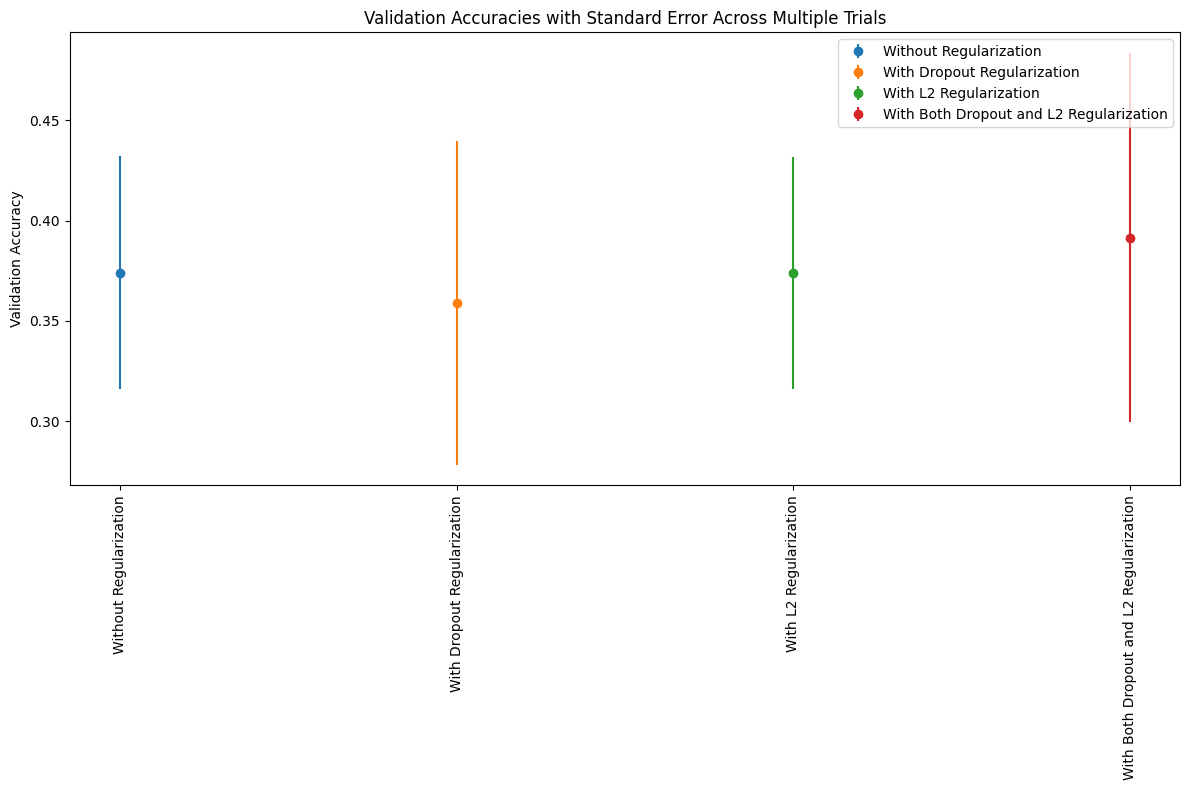

In [ ]:
plt.figure(figsize=(12, 8))
for config_idx, config in enumerate(configurations):
    plt.errorbar(config_idx, mean_accuracies[config_idx, 0], yerr=std_error_accuracies[config_idx, 0], fmt='o', label=config['desc'])

plt.xticks(range(len(configurations)), [config['desc'] for config in configurations], rotation='vertical')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracies with Standard Error Across Multiple Trials')
plt.legend()
plt.tight_layout()
plt.show()